In [1]:
import json

EMBEDDINGS_PATH = './EMBEDDINGS/'

embeddings_meta = []

with open(f'{EMBEDDINGS_PATH}embeddings_meta.jsonl', 'r', encoding="utf-8") as f:
    for l in f:
        embeddings_meta.append(json.loads(l))

In [2]:
import numpy as np

seed = 31415
np.random.seed(seed)

In [8]:
from tqdm.auto import tqdm
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score

pbar_embeddings_meta = tqdm(embeddings_meta) 

for embedding_meta in pbar_embeddings_meta:
    pbar_embeddings_meta.set_description(embedding_meta['dataset_desc'] + "-" + embedding_meta['model_name'])
    
    with open(f"{EMBEDDINGS_PATH}{embedding_meta['file_name']}", 'rb') as f:
        embeddings = pickle.load(f)

    embeddings_train = embeddings['embeddings_train']
    embeddings_test = embeddings['embeddings_test']
    y_train_true = embeddings['y_train_true']
    y_test_true = embeddings['y_test_true']

    num_clusters = len(set(y_test_true))

    kmeans_clusterer = KMeans(n_clusters=num_clusters, random_state=seed)
    kmeans_cluster_labels = kmeans_clusterer.fit_predict(embeddings_test)

    output_dict = {'dataset': embedding_meta['dataset_desc'],
                   'model': embedding_meta['model_name'],
                   'ARI': str(adjusted_rand_score(y_test_true, kmeans_cluster_labels)),
                   'AMI': str(adjusted_mutual_info_score(y_test_true, kmeans_cluster_labels)),
                   'SIL': str(silhouette_score(embeddings_test, kmeans_cluster_labels))}

    with open('clustering_results.jsonl', 'a', encoding="utf-8") as f:
        f.write(json.dumps(output_dict))
        f.write("\n")

  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-p

In [3]:
results = []
with open('clustering_results.jsonl', 'r', encoding="utf-8") as f:
    for l in f:
        results.append(json.loads(l))

In [4]:
import pandas as pd

df_result = pd.DataFrame(results)
df_result['ARI'] = df_result['ARI'].astype(float)
df_result['AMI'] = df_result['AMI'].astype(float)
df_result['SIL'] = df_result['SIL'].astype(float)
df_result['ARI'] = round(df_result['ARI'] * 100, 2)
df_result['AMI'] = round(df_result['AMI'] * 100, 2)
df_result['SIL'] = round(df_result['SIL'] * 100, 2)
df_result.sort_values(by=["dataset", "model"])

,dataset,model,ARI,AMI,SIL
2,CSAbstruct,all-MiniLM-L6-v2,1.11,2.01,2.81
3,CSAbstruct,scibert_scivocab_uncased,6.77,13.05,3.16
0,CSAbstruct,st_minilm_abstruct,28.69,31.91,84.39
1,CSAbstruct,st_scibert_abstruct,50.72,47.32,30.45
10,PMC-Sents-FULL,all-MiniLM-L6-v2,0.21,4.90,2.57
11,PMC-Sents-FULL,scibert_scivocab_uncased,5.34,10.99,5.40
8,PMC-Sents-FULL,st_minilm_pmc_sents_full,36.36,30.17,97.51
9,PMC-Sents-FULL,st_scibert_pmc_sents_full,40.62,33.94,27.28
6,PubMed-RCT,all-MiniLM-L6-v2,6.40,8.49,1.95
7,PubMed-RCT,scibert_scivocab_uncased,22.12,32.67,5.42


In [9]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pickle

def cluster(embedding_meta):
    
    with open(f"{EMBEDDINGS_PATH}{embedding_meta['file_name']}", 'rb') as f:
        embeddings = pickle.load(f)

    embeddings_test = embeddings['embeddings_test']
    y_test_true = embeddings['y_test_true']

    num_clusters = len(set(y_test_true))

    kmeans_clusterer = KMeans(n_clusters=num_clusters, random_state=seed)
    kmeans_cluster_labels = kmeans_clusterer.fit_predict(embeddings_test)

    tSNE=TSNE(n_components=2, init='pca')

    tSNE_result=tSNE.fit_transform(embeddings_test)

    df_kmeans = pd.DataFrame.from_dict({'x':tSNE_result[:,0],'y':tSNE_result[:,1],'Cluster':kmeans_cluster_labels})    

    return df_kmeans, num_clusters

c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gustavo\Desktop\paper\paper2.tar\paper2\TEST\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: Futu

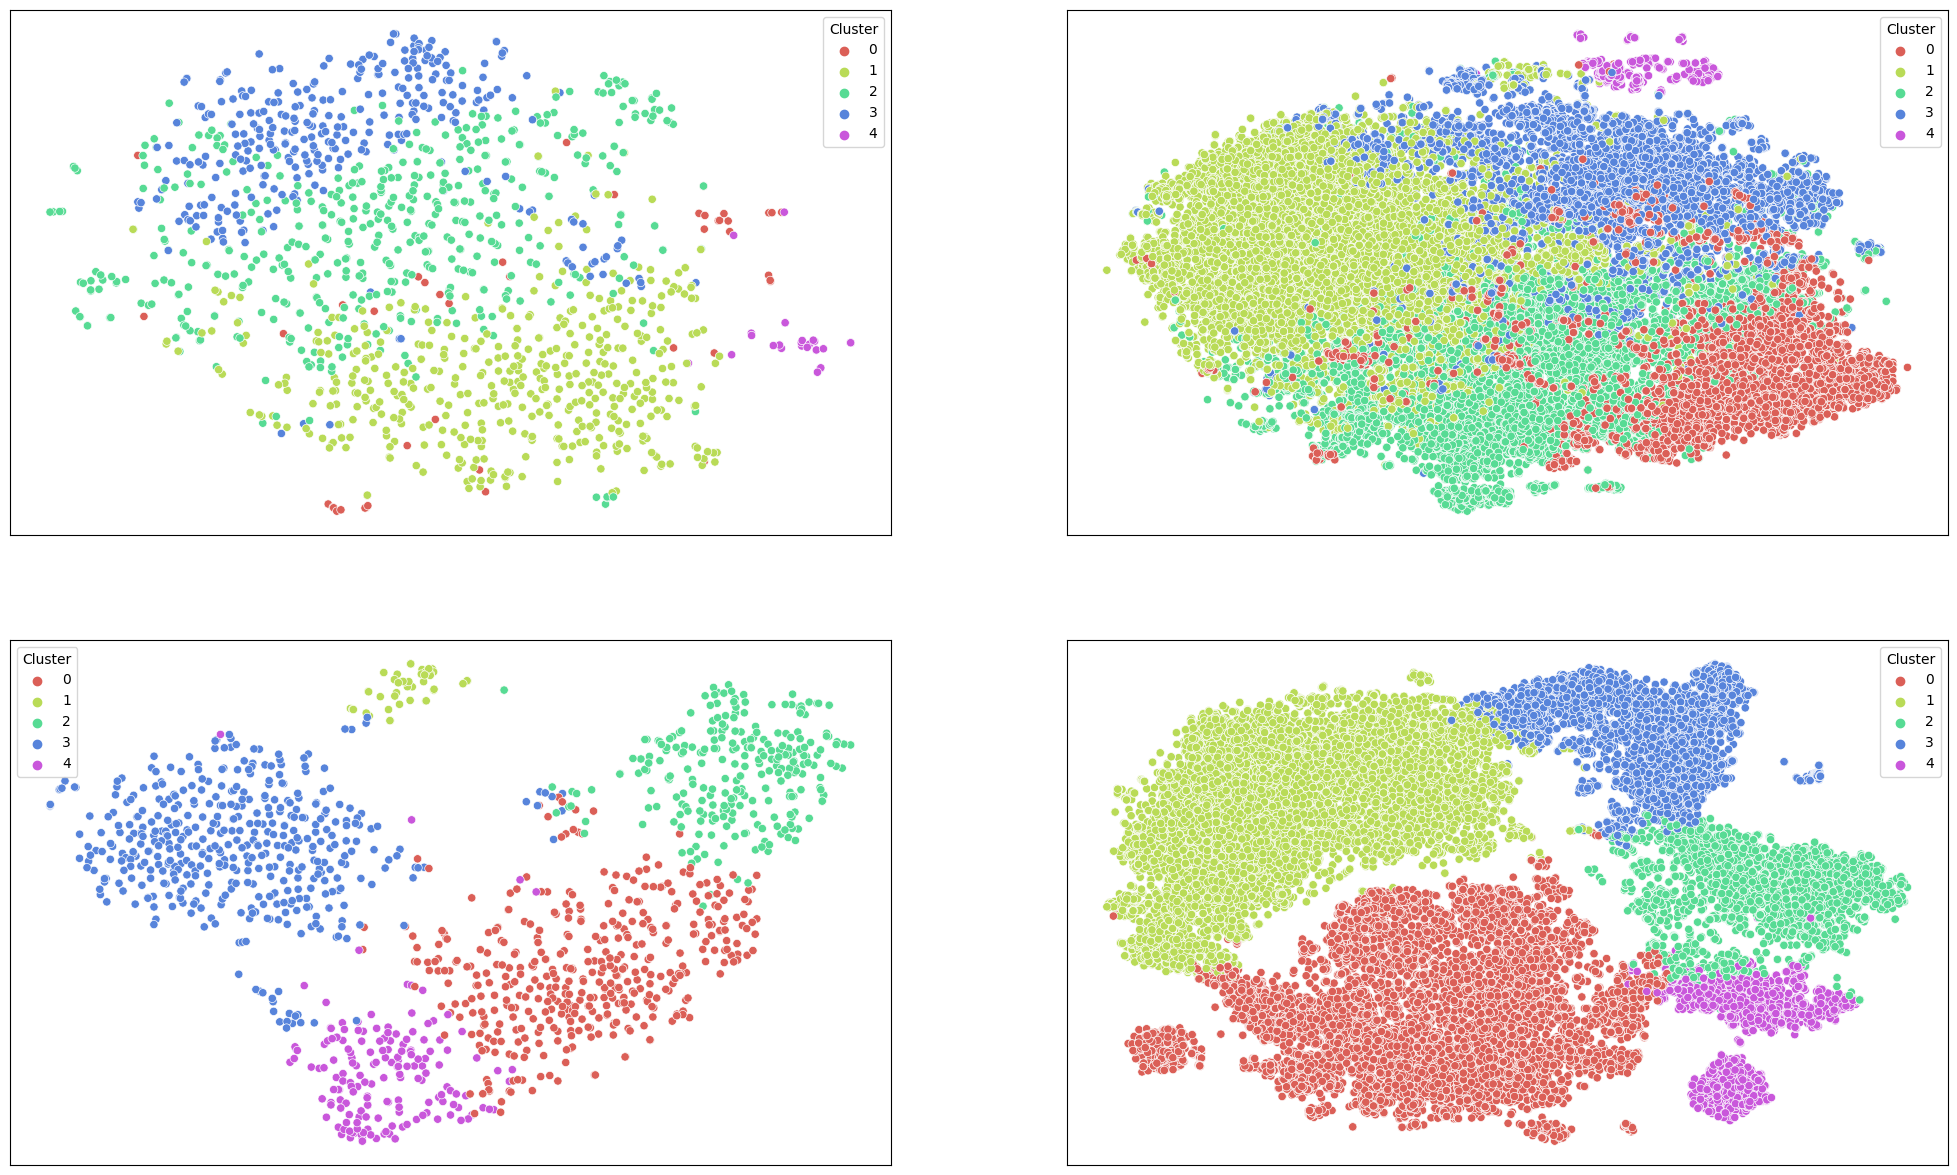

<Figure size 640x480 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

csabstruct_scibert_scivocab_uncased = embeddings_meta[3]
csabstruct_st_scibert_abstruct = embeddings_meta[1]
pubmed_rct_scibert_scivocab_uncased = embeddings_meta[7]
pubmed_rct_st_scibert_pubmed_rct = embeddings_meta[5]

plt.figure(figsize=(25,15))

plt.subplot(2, 2, 1)
df_kmeans, num_clusters = cluster(csabstruct_scibert_scivocab_uncased)
ax = sns.scatterplot(x='x',y='y',hue='Cluster',palette=sns.color_palette("hls",num_clusters),data=df_kmeans,
               legend="full")
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False) 
ax.set(xticklabels=[])
ax.set(xlabel=None) 
ax.tick_params(bottom=False) 

plt.subplot(2, 2, 2)
df_kmeans, num_clusters = cluster(pubmed_rct_scibert_scivocab_uncased)
ax = sns.scatterplot(x='x',y='y',hue='Cluster',palette=sns.color_palette("hls",num_clusters),data=df_kmeans,
               legend="full")
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False) 
ax.set(xticklabels=[])
ax.set(xlabel=None) 
ax.tick_params(bottom=False) 

plt.subplot(2, 2, 3)
df_kmeans, num_clusters = cluster(csabstruct_st_scibert_abstruct)
ax = sns.scatterplot(x='x',y='y',hue='Cluster',palette=sns.color_palette("hls",num_clusters),data=df_kmeans,
               legend="full")
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False) 
ax.set(xticklabels=[])
ax.set(xlabel=None) 
ax.tick_params(bottom=False) 

plt.subplot(2, 2, 4)
df_kmeans, num_clusters = cluster(pubmed_rct_st_scibert_pubmed_rct)
ax = sns.scatterplot(x='x',y='y',hue='Cluster',palette=sns.color_palette("hls",num_clusters),data=df_kmeans,
               legend="full")
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False) 
ax.set(xticklabels=[])
ax.set(xlabel=None) 
ax.tick_params(bottom=False) 

plt.show()
plt.savefig('clusters.png')